In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tulipy as tu

In [3]:
price_data_path = '../data/HistoricalData_NG.csv'
consumption_path = '../data/U.S._Natural_Gas_Total_Consumption_Monthly.csv'
undergound_st_path = '../data/Weekly_Lower_48_States_Natural_Gas_Working_Underground_Storage_Weekly.csv'
us_gross_width_path = '../data/U.S._Natural_Gas_Gross_Withdrawals_Monthly.csv'
o_gross_width_path = '../data/Other_States_Natural_Gas_Gross_Withdrawals_Monthly.csv'

In [4]:
price_data = pd.read_csv(price_data_path, sep=',', index_col=0, parse_dates=True)
cons_data = pd.read_csv(consumption_path, sep=',', index_col=0, parse_dates=True)
undergound_st = pd.read_csv(undergound_st_path, sep=',', index_col=0, parse_dates=True)
us_gross_width = pd.read_csv(us_gross_width_path, sep=',', index_col=0, parse_dates=True)
o_gross_width = pd.read_csv(o_gross_width_path, sep=',', index_col=0, parse_dates=True)

In [5]:
price_data = price_data.dropna()

price_data = price_data.set_index(pd.to_datetime(price_data.index))
price_data.sort_values(by='Date', inplace=True)

cons_data.rename(columns={'Series ID: NG.N9140US2.M Million Cubic Feet':'Consumption in mcf'}, inplace=True)
cons_data.index.rename('Date', inplace=True)
cons_data.sort_values(by='Date', inplace=True)

undergound_st = undergound_st.set_index(pd.to_datetime(undergound_st.index))
undergound_st.rename(columns={'Series ID: NG.NW2_EPG0_SWO_R48_BCF.W Billion Cubic Feet':'Storage in mcf'}, inplace=True)
undergound_st.index.rename('Date', inplace=True)
undergound_st.sort_values(by='Date', inplace=True)

us_gross_width.rename(columns={'Series ID: NG.N9010US2.M Million Cubic Feet':'US Gross Withdrawal in mcf'}, inplace=True)
us_gross_width.index.rename('Date', inplace=True)
us_gross_width.sort_values(by='Date', inplace=True)

o_gross_width.rename(columns={'Series ID: NG.N9010982.M Million Cubic Feet':'Other Gross Withdrawal in mcf'}, inplace=True)
o_gross_width.index.rename('Date', inplace=True)
o_gross_width.sort_values(by='Date', inplace=True)

In [6]:
undergound_st

,Storage in mcf
Date,
2010-01-01,3117
2010-01-08,2850
2010-01-15,2607
2010-01-22,2521
2010-01-29,2406
...,...
2021-07-23,2714
2021-07-30,2727
2021-08-06,2776


In [7]:
res = pd.concat([price_data, cons_data, undergound_st, us_gross_width, o_gross_width], axis=1)

In [8]:
useful_columns = list(set(res.columns) - {'Close', 'High', 'Low', 'Volume', 'Open'})

for col in useful_columns:
    res[col] = res[col].ffill()

In [9]:
res.iloc[-65:-45]

,Close,Volume,Open,High,Low,Consumption in mcf,Storage in mcf,US Gross Withdrawal in mcf,Other Gross Withdrawal in mcf
Date,,,,,,,,,
2021-05-28,2.986,105311.0,2.963,3.042,2.955,2100668.0,2313.0,3521964.0,33849.0
2021-06-01,3.104,182279.0,3.103,3.126,3.093,2218011.0,2313.0,3396062.0,32500.0
2021-06-02,3.075,107268.0,3.093,3.126,3.050,2218011.0,2313.0,3396062.0,32500.0
2021-06-03,3.041,92205.0,3.073,3.090,3.032,2218011.0,2313.0,3396062.0,32500.0
2021-06-04,3.097,112977.0,3.063,3.121,3.010,2218011.0,2411.0,3396062.0,32500.0
2021-06-07,3.070,114216.0,3.109,3.115,3.033,2218011.0,2411.0,3396062.0,32500.0
2021-06-08,3.128,185863.0,3.092,3.198,3.092,2218011.0,2411.0,3396062.0,32500.0
2021-06-09,3.129,108045.0,3.128,3.168,3.106,2218011.0,2411.0,3396062.0,32500.0
2021-06-10,3.149,130146.0,3.154,3.200,3.131,2218011.0,2411.0,3396062.0,32500.0


In [10]:
res.describe()

,Close,Volume,Open,High,Low,Consumption in mcf,Storage in mcf,US Gross Withdrawal in mcf,Other Gross Withdrawal in mcf
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2.772000e+03,2664.000000,3.024000e+03,2892.000000
mean,2.999582,120918.455635,3.001344,3.057486,2.945068,2.300407e+06,2750.539039,2.741379e+06,54772.980290
std,0.730453,57514.917744,0.728603,0.744170,0.717324,4.379794e+05,766.931581,4.850602e+05,20209.712138
min,1.482000,4.000000,1.441000,1.567000,1.432000,1.368369e+06,824.000000,1.449958e+06,30059.000000
25%,2.561000,87901.000000,2.566500,2.608250,2.511250,1.947752e+06,2203.000000,2.475947e+06,40372.000000
50%,2.881500,120407.000000,2.882500,2.934000,2.828000,2.208375e+06,2798.000000,2.721210e+06,49149.000000
75%,3.480750,153246.750000,3.477750,3.553750,3.417250,2.588168e+06,3362.250000,3.153978e+06,58221.000000
max,6.149000,435320.000000,6.080000,6.493000,5.882000,3.409295e+06,4047.000000,3.620708e+06,109113.000000


In [11]:
for col in res.columns:
    print(col, ': ', res[col].isnull().sum())

Close :  606
Volume :  606
Open :  606
High :  606
Low :  606
Consumption in mcf :  336
Storage in mcf :  444
US Gross Withdrawal in mcf :  84
Other Gross Withdrawal in mcf :  216


In [12]:
res_ = res.dropna()

days = pd.date_range(res_.index[0], res_.index[-1], freq='D')

# Adding Technical Indicators

In [13]:
rsi = tu.rsi(res_.Close.values, 14)

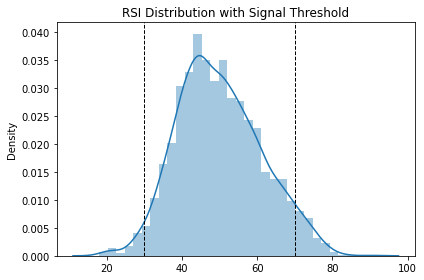

In [14]:
ax = sns.distplot(rsi)
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('RSI Distribution with Signal Threshold')
plt.tight_layout();

In [15]:
rsi_df = pd.DataFrame(data={
    'Date': res_.index[-len(rsi):],
    'RSI': rsi
})
rsi_df.set_index('Date', inplace=True)

In [16]:
atr = tu.atr(res_.High.values, res_.Low.values, res_.Close.values, 14)

# atr = (atr - atr.mean()) / atr.std()

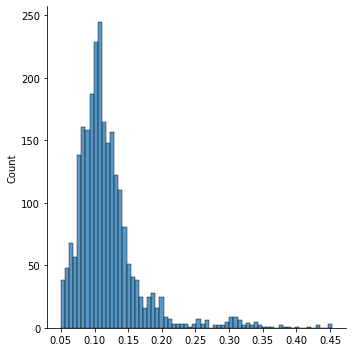

In [17]:
sns.displot(atr)

In [18]:
atr_df = pd.DataFrame(data={
    'Date':res_.index[-len(atr):],
    'ATR':atr
})
atr_df.set_index('Date', inplace=True)

In [19]:
macd, macd_signal, macd_hist = tu.macd(res_.Close.values, 12, 26, 9)

# macd = (macd - np.mean(macd)) / np.std(macd)

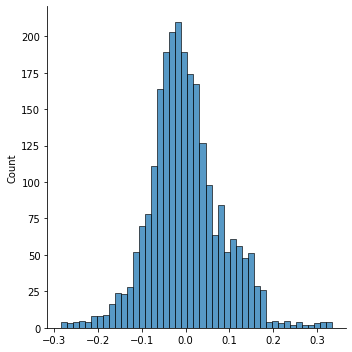

In [20]:
sns.displot(macd)

In [21]:
macd_df = pd.DataFrame(data={
    'Date': res_.index[-len(macd):],
    'MACD': macd
})
macd_df.set_index('Date', inplace=True)

In [22]:
res_ = pd.concat([res_, rsi_df, atr_df, macd_df], axis=1)
res_.dropna(inplace=True)

In [23]:
res_

,Close,Volume,Open,High,Low,Consumption in mcf,Storage in mcf,US Gross Withdrawal in mcf,Other Gross Withdrawal in mcf,RSI,ATR,MACD
Date,,,,,,,,,,,,
2011-10-06,3.598,144492.0,3.565,3.634,3.512,1744454.0,3408.0,2502387.0,94315.0,32.805890,0.114925,-0.091309
2011-10-07,3.481,139225.0,3.595,3.600,3.472,1744454.0,3521.0,2502387.0,94315.0,28.027756,0.115859,-0.100688
2011-10-10,3.541,122903.0,3.486,3.563,3.457,1744454.0,3521.0,2502387.0,94315.0,33.385996,0.115155,-0.102430
2011-10-11,3.616,168456.0,3.562,3.627,3.513,1744454.0,3521.0,2502387.0,94315.0,39.453890,0.115073,-0.097022
2011-10-12,3.489,158954.0,3.520,3.540,3.480,1744454.0,3521.0,2502387.0,94315.0,33.833721,0.116567,-0.101203
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,3.896,54557.0,3.929,3.970,3.884,2218011.0,2851.0,3396062.0,32500.0,50.393336,0.132758,0.022960
2021-08-25,3.897,37979.0,3.900,3.991,3.858,2218011.0,2851.0,3396062.0,32500.0,50.456830,0.132775,0.019566
2021-08-26,4.184,64362.0,3.917,4.217,3.896,2218011.0,2851.0,3396062.0,32500.0,64.500602,0.146220,0.038202


# Compute Lagged Returns

In [24]:
lags = [1, 5, 10, 21, 42, 63]

for lag in lags:
    res_[f'return_{lag}d'] = (res_.Close.pct_change(lag)
                              .add(1)
                              .pow(1 / lag)
                              .sub(1))

# Shift lagged returns

In [25]:

for t in [1, 2, 3, 4, 5]:
    for lag in [1, 5, 10, 21]:
        res_[f'return_{lag}d_lag{t}'] = (res_[f'return_{lag}d'].shift(t * lag))

# Compute forward returns

In [26]:
for t in [1, 5, 10, 21]:
    res_[f'target_{t}d'] = res_[f'return_{t}d'].shift(-t)

In [27]:
res_

,Close,Volume,Open,High,Low,Consumption in mcf,Storage in mcf,US Gross Withdrawal in mcf,Other Gross Withdrawal in mcf,RSI,...,return_10d_lag4,return_21d_lag4,return_1d_lag5,return_5d_lag5,return_10d_lag5,return_21d_lag5,target_1d,target_5d,target_10d,target_21d
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-06,3.598,144492.0,3.565,3.634,3.512,1744454.0,3408.0,2502387.0,94315.0,32.805890,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.032518,-0.003752,0.000886,0.002390
2011-10-07,3.481,139225.0,3.595,3.600,3.472,1744454.0,3521.0,2502387.0,94315.0,28.027756,...,NaN,NaN,NaN,NaN,NaN,NaN,0.017236,0.012441,0.004172,0.002858
2011-10-10,3.541,122903.0,3.486,3.563,3.457,1744454.0,3521.0,2502387.0,94315.0,33.385996,...,NaN,NaN,NaN,NaN,NaN,NaN,0.021180,0.008168,0.001765,0.002671
2011-10-11,3.616,168456.0,3.562,3.627,3.513,1744454.0,3521.0,2502387.0,94315.0,39.453890,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.035122,-0.003509,0.001155,0.000472
2011-10-12,3.489,158954.0,3.520,3.540,3.480,1744454.0,3521.0,2502387.0,94315.0,33.833721,...,NaN,NaN,NaN,NaN,NaN,NaN,0.012038,0.005500,0.002858,0.002137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,3.896,54557.0,3.929,3.970,3.884,2218011.0,2851.0,3396062.0,32500.0,50.393336,...,0.006967,0.003919,-0.027623,0.009556,0.011629,-0.003989,0.000257,NaN,NaN,NaN
2021-08-25,3.897,37979.0,3.900,3.991,3.858,2218011.0,2851.0,3396062.0,32500.0,50.456830,...,0.011431,0.005564,0.003909,0.015830,0.004297,-0.003923,0.073646,NaN,NaN,NaN
2021-08-26,4.184,64362.0,3.917,4.217,3.896,2218011.0,2851.0,3396062.0,32500.0,64.500602,...,0.011644,0.005883,-0.005711,0.020656,0.005581,-0.003285,0.044455,NaN,NaN,NaN


In [28]:
save_data = True

res_['year'] = res_.index.get_level_values('Date').year
res_['month'] = res_.index.get_level_values('Date').month
res_['weekday'] = res_.index.get_level_values('Date').weekday

res_.dropna(inplace=True)

if save_data:
    res_.to_hdf('../data/model_data.h5', 'no_dummies', mode='w')

In [29]:
res_ = pd.get_dummies(res_,
                      columns=['year', 'month', 'weekday'],
                      prefix=['year', 'month', 'weekday'],
                      prefix_sep=['_','_', '_'])

In [30]:
res_.dropna(inplace=True)

res_.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2330 entries, 2012-04-09 to 2021-07-30
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Close                          2330 non-null   float64
 1   Volume                         2330 non-null   float64
 2   Open                           2330 non-null   float64
 3   High                           2330 non-null   float64
 4   Low                            2330 non-null   float64
 5   Consumption in mcf             2330 non-null   float64
 6   Storage in mcf                 2330 non-null   float64
 7   US Gross Withdrawal in mcf     2330 non-null   float64
 8   Other Gross Withdrawal in mcf  2330 non-null   float64
 9   RSI                            2330 non-null   float64
 10  ATR                            2330 non-null   float64
 11  MACD                           2330 non-null   float64
 12  return_1d                     

In [31]:
if save_data:
    res_.to_hdf('../data/model_data.h5', 'model_data', mode='a')